In [55]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

 
# Set data
df = pd.read_csv('summary.csv')
df

,dataset,model,Attention_Suff,Scaled_Attention_Suff,Gradients_Suff,Integrated_Gradients_Suff,Deeplift_Suff,Attention_Comp,Scaled_Attention_Comp,Gradients_Comp,Integrated_Gradients_Comp,Deeplift_Comp,Accuracy,F1
0,ChnSentiCorp,mbert,1.090,1.088,1.048,1.103,1.026,1.371,1.379,1.157,1.324,1.160,0.858,NaN
1,ChnSentiCorp,zhbert,1.119,1.124,0.998,1.077,0.951,1.188,1.180,1.039,1.245,1.027,0.902,NaN
2,ChnSentiCorp,macbert,1.112,1.113,0.996,1.064,0.985,1.231,1.228,1.068,1.178,1.025,0.912,NaN
3,ChnSentiCorp,xlm_roberta,1.036,1.044,1.035,1.011,1.023,0.835,0.833,1.005,1.038,0.986,0.905,NaN
4,ChnSentiCorp,chinese_roberta,1.208,1.197,1.085,1.241,1.095,1.078,1.083,1.110,1.370,1.128,0.908,NaN
5,multirc,mbert,1.153,1.160,1.000,1.078,0.999,0.996,0.993,1.002,1.005,1.002,NaN,0.708
6,multirc,bert,1.296,1.287,1.036,1.101,0.986,1.007,1.010,0.999,0.999,1.000,NaN,0.680
7,multirc,xlm_roberta,1.005,0.991,1.075,0.958,0.985,0.974,0.981,1.043,1.064,1.012,NaN,0.580
8,multirc,roberta,1.117,1.131,1.022,1.026,1.151,1.104,1.096,1.113,1.074,1.055,NaN,0.729
9,ant,mbert,1.048,1.045,0.987,1.005,0.966,1.104,1.113,0.993,0.981,1.020,0.913,NaN


In [56]:
comp_of_all = df[['dataset', 'model', 'Attention_Comp', 'Scaled_Attention_Comp', 'Gradients_Comp', 'Integrated_Gradients_Comp', 'Deeplift_Comp']]
suff_of_all = df[['dataset', 'model', 'Attention_Suff', 'Scaled_Attention_Suff', 'Gradients_Suff', 'Integrated_Gradients_Suff', 'Deeplift_Suff']]

In [57]:
def plot_one_dataset(dataset, title, suff_or_comp):
    # ------- PART 1: Create background
    
    df = dataset.drop(columns=['dataset'])
    model_list = df['model']
    # number of variable
    categories=list(df)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.8, 1.0, 1.2], ["0.8", "1.0","1.2"], color="grey", size=7)
    #plt.yticks([1.0], ["1.0"], color="grey", size=7)
    plt.ylim(0.8,1.3)
    

    # ------- PART 2: Add plots
    # Plot each individual = each line of the data
    
    for i in range(len(model_list)):
        values=df.loc[i].drop('model').values.flatten().tolist()
        values += values[:1]
        label_str = str(model_list[i])
        if label_str == 'mbert' or label_str == 'xlm_roberta': linestyle_str = 'dashed'
        else: linestyle_str = 'solid'
        ax.plot(angles, values, linewidth=1, linestyle=linestyle_str,  label=label_str)
    #ax.fill(angles, values, 'b', alpha=0.1)


    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, size=11, y=1.1)
    # Show the graph
    plt.show()
    plt.savefig(f'./plots/{title}_{suff_or_comp}.png')

==>> ant_suff:    dataset            model  Attention_Suff  Scaled_Attention_Suff  \
9      ant            mbert           1.048                  1.045   
10     ant           zhbert           1.024                  1.038   
11     ant      xlm_roberta           1.026                  1.029   
12     ant          macbert           1.018                  1.002   
13     ant  chinese_roberta           1.043                  1.047   

    Gradients_Suff  Integrated_Gradients_Suff  Deeplift_Suff  
9            0.987                      1.005          0.966  
10           0.982                      0.974          0.998  
11           0.999                      1.016          1.020  
12           0.969                      0.998          0.990  
13           0.979                      1.011          0.963  


KeyError: 0

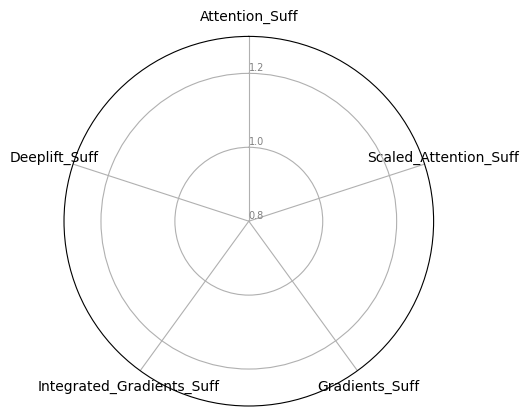

In [59]:
chinese_dataset = ['ChnSentiCorp', 'ant', 'csl']

# ChnSentiCorp_suff = suff_of_all.loc[suff_of_all['dataset'] == 'ChnSentiCorp']
# plot_one_dataset(ChnSentiCorp_suff, 'ChnSentiCorp', 'suff')

ant_suff = suff_of_all.loc[suff_of_all['dataset'] == 'ant']
print(f"==>> ant_suff: {ant_suff}")
plot_one_dataset(ant_suff, 'ant', 'suff')

csl_suff = suff_of_all.loc[suff_of_all['dataset'] == 'csl']
plot_one_dataset(csl_suff, 'csl', 'suff')

In [ ]:
df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


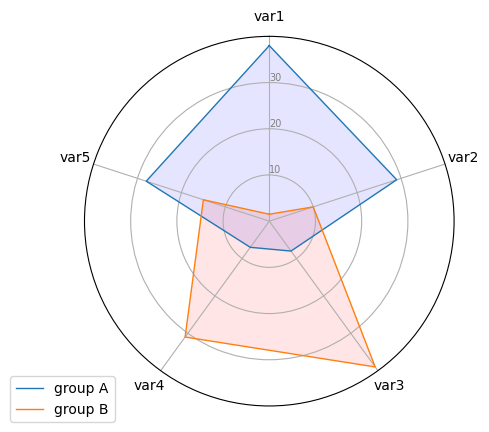

In [ ]:
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()